# Q1 Simulator Tests

In [1]:
import sys
sys.path.append('..')

1. Initialize the Auxilliary ship model
    ###### Using the data given 'An Alternative Propulsion Plant for Naval Auxiliary Ships' by Edward Lawrence Stone. (post-graduate thesis)

    ![Auxiliary Ship Model](../T-AO-system_diagrams.png)

In [2]:
from shipClass.SensedShip import SensedShip
from shipClass.Ship import Ship

# initialize the auxiliary ship as a repairable manned ship
auxiliary_ship = Ship("Auxiliary Ship", "auxiliary_ship_data.xlsx")

# create a sensed version of the auxiliary ship with defualt 3 'good' sensors per component
sensed_auxiliary_ship = SensedShip(auxiliary_ship)

# add variables which point to each individual system object
systems = list(sensed_auxiliary_ship.ship.systems.values())
fuel_sys = systems[0] # fuel system
engine_1_sys = systems[1] # engine 1 system
engine_2_sys = systems[2] # engine 2 system
transmission_sys = systems[3] # transmission system

print(fuel_sys.name)
print(engine_1_sys.name)
print(engine_2_sys.name)
print(transmission_sys.name)

fuel system
engine engine #1 system 
engine engine #2 system 
transmission system


2. Testing simulators ability to find the lowest MTTF components (3 comps)

In [3]:
from Simulators.Q1_Simulator import Q1_Simulator

# Create a Q1_Simulator instance
simulator = Q1_Simulator(sensed_auxiliary_ship)

# function to identify the frequently failing components
ship_quick_fail_parts = simulator.identify_freq_fail_parts(sensed_auxiliary_ship)   # ship test
print('The ships frequently failing parts are:')
for part, mttf in ship_quick_fail_parts.items():
    print(part.name, f'(MTTF: {mttf:.2f})')

fuel_sys_quick_fail_parts = simulator.identify_freq_fail_parts(fuel_sys)   # system test
print('The fuel system frequently failing parts are:')
for part, mttf in fuel_sys_quick_fail_parts.items():
    print(part.name, f'(MTTF: {mttf:.2f})')

transmission_sys_quick_fail_parts = simulator.identify_freq_fail_parts(transmission_sys)   # system test
print('The transmission system frequently failing parts are:')
for part, mttf in transmission_sys_quick_fail_parts.items():
    print(part.name, f'(MTTF: {mttf:.2f})')

The ships frequently failing parts are:
['Fuel Oil Motor', 'Fuel Oil Pump'] (MTTF: 3173.08)
['Fuel Oil Motor', 'Fuel Oil Pump'] (MTTF: 3173.08)
Lube Oil Pump (MTTF: 4000.00)
The fuel system frequently failing parts are:
['Fuel Oil Motor', 'Fuel Oil Pump'] (MTTF: 3173.08)
['Fuel Oil Motor', 'Fuel Oil Pump'] (MTTF: 3173.08)
Fuel Oil Purifier (MTTF: 10000.00)
The transmission system frequently failing parts are:
CRP Propeller (MTTF: 25000.00)
Reduction Gear (MTTF: 200000.00)
Shaft and Bearings (MTTF: 200000.00)


3. Test simulators ability to increase the ships redundancy


* Does not work for the engine systems only 

[(2, 3)]
[(2, 3), (6, 7)]
[(2, 3), (6, 7), (8, 9)]
The original engine 2 sys, has 8 components
and the parallels are None
The first variation of the engine 2 sys, has 9 components
and the parallels are [(2, 3)]
The second variation of the engine 2 sys, has 10 components
and the parallels are [(2, 3), (6, 7)]
The third variation of the engine 2 sys, has 11 components
and the parallels are [(2, 3), (6, 7), (8, 9)]


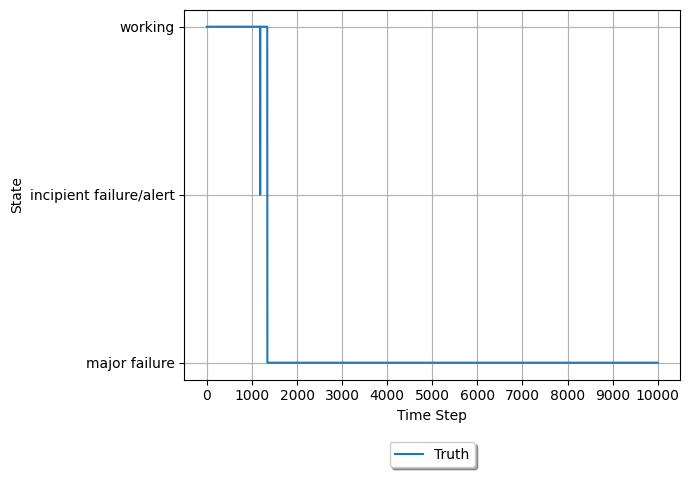

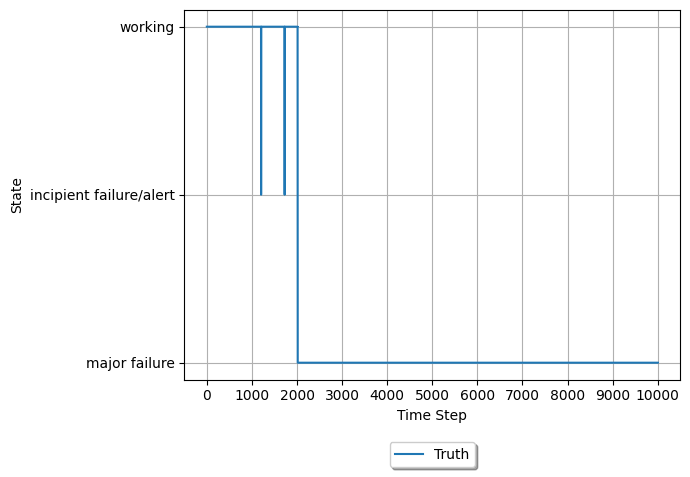

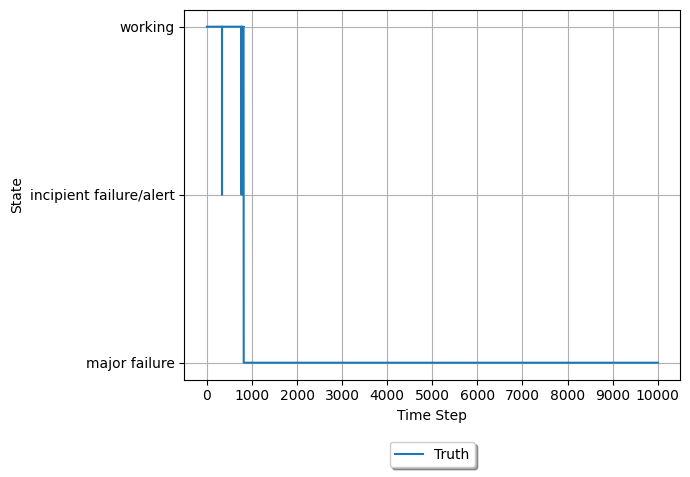

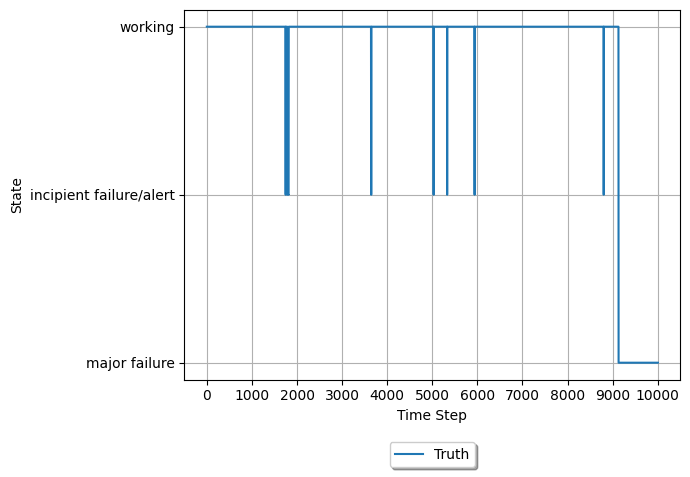

In [4]:
simulator.increase_sys_redundancy(engine_2_sys)

print('The original engine 2 sys, has', len(engine_2_sys.comps), 'components')
print('and the parallels are', engine_2_sys.parallels)
engine_2_sys.simulate(10000)
engine_2_sys.plotHistory()

better_engine_2_sys1 = simulator.shipVariations[0].ship.systems[engine_2_sys.name]
print(f'The first variation of the engine 2 sys, has {len(better_engine_2_sys1.comps)} components')
print(f'and the parallels are {better_engine_2_sys1.parallels}')
better_engine_2_sys1.simulate(10000)
better_engine_2_sys1.plotHistory()

better_engine_2_sys2 = simulator.shipVariations[1].ship.systems[engine_2_sys.name]
print(f'The second variation of the engine 2 sys, has {len(better_engine_2_sys2.comps)} components')
print(f'and the parallels are {better_engine_2_sys2.parallels}')
better_engine_2_sys2.simulate(10000)
better_engine_2_sys2.plotHistory()

better_engine_2_sys3 = simulator.shipVariations[2].ship.systems[engine_2_sys.name]
print(f'The third variation of the engine 2 sys, has {len(better_engine_2_sys3.comps)} components')
print(f'and the parallels are {better_engine_2_sys3.parallels}')
better_engine_2_sys3.simulate(10000)
better_engine_2_sys3.plotHistory()


In [5]:
# print(fuel_sys.name)
simulator.increase_sys_redundancy(fuel_sys)

print('The original fuel sys, has', len(fuel_sys.comps), 'components')
print('and the parallels are', fuel_sys.parallels)
fuel_sys.simulate(10000)
fuel_sys.plotHistory()

better_fuel_sys1 = simulator.shipVariations[0].ship.systems[fuel_sys.name]
print(f'The first variation of the fuel sys, has {len(better_fuel_sys1.comps)} components')
print(f'and the parallels are {better_fuel_sys1.parallels}')
better_fuel_sys1.simulate(10000)
better_fuel_sys1.plotHistory()

better_fuel_sys2 = simulator.shipVariations[1].ship.systems[fuel_sys.name]
print(f'The second variation of the fuel sys, has {len(better_fuel_sys2.comps)} components')
print(f'and the parallels are {better_fuel_sys2.parallels}')
better_fuel_sys2.simulate(10000)
better_fuel_sys2.plotHistory()

better_fuel_sys3 = simulator.shipVariations[2].ship.systems[fuel_sys.name]
print(f'The third variation of the fuel sys, has {len(better_fuel_sys3.comps)} components')
print(f'and the parallels are {better_fuel_sys3.parallels}')
better_fuel_sys3.simulate(10000)
better_fuel_sys3.plotHistory()




IndexError: list index out of range

In [ ]:
print(len(simulator.shipVariations), 'ship variations were created previously.\n')

# add three more variations focused on the ships lowest reliability parts
simulator.increase_ship_redundancy()
print(len(simulator.shipVariations), 'ship variations were created.')

6 ship variations were created previously.


 Adding ['Fuel Oil Motor', 'Fuel Oil Pump'] in: fuel system

 Adding ['Fuel Oil Motor', 'Fuel Oil Pump'] in: fuel system

 Adding Lube Oil Pump in: engine engine #1 system 
[(2, 3)]


IndexError: list index out of range